In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
print(data.head())

   id  bone_length  rotting_flesh  hair_length  has_soul  color    type
0   0     0.354512       0.350839     0.465761  0.781142  clear   Ghoul
1   1     0.575560       0.425868     0.531401  0.439899  green  Goblin
2   2     0.467875       0.354330     0.811616  0.791225  black   Ghoul
3   4     0.776652       0.508723     0.636766  0.884464  black   Ghoul
4   5     0.566117       0.875862     0.418594  0.636438  green   Ghost


In [3]:
data.isnull().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64

In [4]:
data.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


In [5]:
data = data.drop('id',axis = 1)
print(data.head())

   bone_length  rotting_flesh  hair_length  has_soul  color    type
0     0.354512       0.350839     0.465761  0.781142  clear   Ghoul
1     0.575560       0.425868     0.531401  0.439899  green  Goblin
2     0.467875       0.354330     0.811616  0.791225  black   Ghoul
3     0.776652       0.508723     0.636766  0.884464  black   Ghoul
4     0.566117       0.875862     0.418594  0.636438  green   Ghost


In [6]:
x = data.drop('type',axis=1)
y= data['type']


In [7]:
from sklearn.preprocessing import LabelEncoder
test = pd.read_csv('test.csv')
xx = LabelEncoder()

print(x['color'][:5])
print(test['color'][:5])
x['color'] = xx.fit_transform(x['color'])
test['color'] = xx.fit_transform(test['color'])
x['color']=x['color']/10
test['color']=test['color']/10

#x=pd.get_dummies(x,prefix = ['color'])
#test =pd.get_dummies(test,prefix = ['color'])


test_id = test['id']
test = test.drop('id',axis = 1)




0    clear
1    green
2    black
3    black
4    green
Name: color, dtype: object
0    black
1    white
2    black
3    white
4    black
Name: color, dtype: object


In [8]:
print(x.head())

   bone_length  rotting_flesh  hair_length  has_soul  color
0     0.354512       0.350839     0.465761  0.781142    0.3
1     0.575560       0.425868     0.531401  0.439899    0.4
2     0.467875       0.354330     0.811616  0.791225    0.0
3     0.776652       0.508723     0.636766  0.884464    0.0
4     0.566117       0.875862     0.418594  0.636438    0.4


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y[:5])

[1 2 1 1 0]


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB



In [11]:
classifiers = {
    "KNN":KNeighborsClassifier(),
    "SVM":SVC(kernel='linear'),
    "Logistic Regression":LogisticRegression(penalty = 'l1'),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Naive Bayes":MultinomialNB()
}

for key,value in classifiers.items():
    clf = value
    scores = cross_val_score(clf,x,y,cv=5)
    print("{}:{}".format(key,np.mean(scores)))
    


KNN:0.6846249537208441
SVM:0.7572765642354684
Logistic Regression:0.7410252992718747
Decision Tree:0.6039333580155499
Random Forest:0.6980673824509441
Naive Bayes:0.5279955572010366


C:\Users\Dhruv\Downloads\WPy-3662\python-3.6.6.amd64\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


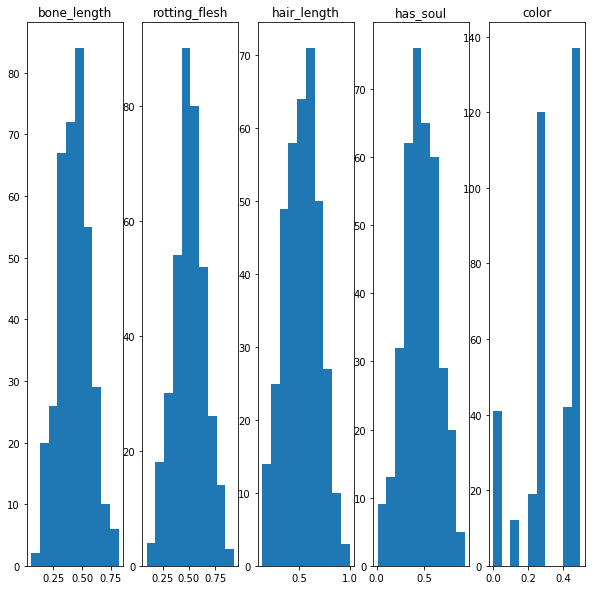

In [12]:
fig,axes = plt.subplots(1,5,figsize=(10,10))
columns = list(x.head(0))
for i,ax in enumerate(axes.flat):
    ax.hist(x[columns[i]])
    ax.set_title(columns[i])
    
fig.show()   


In [13]:
import seaborn as sns

In [14]:
print(x.shape)

(371, 5)


In [15]:
clf = SVC(kernel='rbf')

In [16]:
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:

print(test.head())



   bone_length  rotting_flesh  hair_length  has_soul  color
0     0.471774       0.387937     0.706087  0.698537    0.0
1     0.427332       0.645024     0.565558  0.451462    0.5
2     0.549602       0.491931     0.660387  0.449809    0.0
3     0.638095       0.682867     0.471409  0.356924    0.5
4     0.361762       0.583997     0.377256  0.276364    0.0


In [18]:
predictions = clf.predict(test)
print(predictions[:10])

[1 2 1 0 0 0 1 1 2 1]


In [19]:
predictions = le.inverse_transform(predictions)

C:\Users\Dhruv\Downloads\WPy-3662\python-3.6.6.amd64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [20]:
print(predictions)

['Ghoul' 'Goblin' 'Ghoul' 'Ghost' 'Ghost' 'Ghost' 'Ghoul' 'Ghoul' 'Goblin'
 'Ghoul' 'Ghost' 'Ghoul' 'Goblin' 'Ghost' 'Ghoul' 'Ghost' 'Ghoul' 'Ghost'
 'Ghost' 'Ghoul' 'Ghoul' 'Goblin' 'Ghoul' 'Goblin' 'Goblin' 'Goblin'
 'Ghoul' 'Goblin' 'Ghoul' 'Ghoul' 'Goblin' 'Ghoul' 'Ghoul' 'Goblin'
 'Goblin' 'Ghoul' 'Ghost' 'Goblin' 'Ghost' 'Ghoul' 'Goblin' 'Ghoul'
 'Goblin' 'Ghoul' 'Goblin' 'Ghoul' 'Ghoul' 'Ghoul' 'Ghoul' 'Goblin'
 'Goblin' 'Ghoul' 'Ghost' 'Goblin' 'Goblin' 'Ghost' 'Goblin' 'Ghoul'
 'Ghoul' 'Ghost' 'Ghoul' 'Ghoul' 'Ghost' 'Goblin' 'Ghoul' 'Ghoul' 'Ghoul'
 'Ghoul' 'Goblin' 'Ghoul' 'Goblin' 'Ghost' 'Ghoul' 'Ghoul' 'Goblin'
 'Ghoul' 'Ghoul' 'Ghoul' 'Ghost' 'Goblin' 'Ghost' 'Goblin' 'Ghoul' 'Ghoul'
 'Ghost' 'Ghost' 'Ghost' 'Goblin' 'Ghost' 'Ghost' 'Ghost' 'Ghost' 'Goblin'
 'Goblin' 'Ghost' 'Ghost' 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Goblin'
 'Goblin' 'Ghoul' 'Ghost' 'Ghoul' 'Ghoul' 'Ghoul' 'Goblin' 'Ghoul' 'Ghoul'
 'Ghost' 'Goblin' 'Goblin' 'Goblin' 'Ghoul' 'Ghost' 'Goblin' 'Goblin'
 

In [21]:
df = pd.DataFrame()
df['id']= test_id
df['type'] = predictions

In [22]:
print(df.head())

   id    type
0   3   Ghoul
1   6  Goblin
2   9   Ghoul
3  10   Ghost
4  13   Ghost


In [23]:
df.to_csv('submission.csv',index = False)

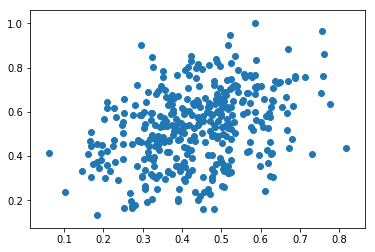

In [24]:
plt.scatter(x['bone_length'],x['hair_length'])

In [29]:
from sklearn.ensemble import VotingClassifier
names = [ "SVM Linear","Logistic Regression","RF","KNN"]

classifiers = [
   
    SVC(kernel = 'linear'),
    LogisticRegression(penalty = 'l1'),
    RandomForestClassifier(),
    KNeighborsClassifier()
    
    
    
]
models = list(zip(names,classifiers))
model = VotingClassifier(estimators = models, voting = 'hard',n_jobs = -1)
scores = cross_val_score(model,x,y,cv=5)
print("{}".format(np.mean(scores)))

C:\Users\Dhruv\Downloads\WPy-3662\python-3.6.6.amd64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Dhruv\Downloads\WPy-3662\python-3.6.6.amd64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Dhruv\Downloads\WPy-3662\python-3.6.6.amd64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Dhruv\Downloads\WPy-3662\python-3.6.6.amd64\lib\site-packages\sklearn\prepro

0.74643070467728


C:\Users\Dhruv\Downloads\WPy-3662\python-3.6.6.amd64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [26]:
model.fit(x,y)
predictions = model.predict(test)
predictions = le.inverse_transform(predictions)
df = pd.DataFrame()
df['id']= test_id
df['type'] = predictions
df.to_csv('submission.csv',index = False)



C:\Users\Dhruv\Downloads\WPy-3662\python-3.6.6.amd64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Dhruv\Downloads\WPy-3662\python-3.6.6.amd64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
